In [1]:
from model import Module, Sequential
from activation import ReLU, Tanh, MSELoss
from linear import Linear
from disc_generator import generate_disc_set, plot_set

In [2]:
train_input, train_target, test_input, test_target, test_mask, train_mask = generate_disc_set(1000)

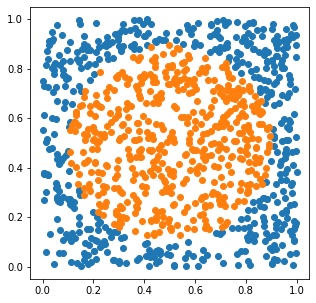

In [3]:
plot_set(train_input, train_mask)

In [4]:
def train_model(model, train_input, train_target, nb_epochs, mini_batch_size, criterion=MSELoss(), eta = 1e-3):
    for e in range(nb_epochs):
        sum_loss = 0
        for b in range(0, train_input.size(0), mini_batch_size):
            # forward pass
            output = model.forward(train_input.narrow(0, b, mini_batch_size))
            loss = criterion.forward(output, train_target.narrow(0, b, mini_batch_size))
            sum_loss += loss.item()
            
            model.zero_gradient()
            model.backward(criterion.backward(output, train_target.narrow(0, b, mini_batch_size)))
            model.SGD(eta, momentum)
            
            
        output = model.forward(train_input)
        pred = output.max(1)[1]
        error = (pred != train_mask.view(1,-1)).sum()
        error_rate = (error/train_input.size(0)) * 100
        
        print("epoch: {}, loss: {:.02f}, error {:.02f}% ".format(e, sum_loss, error_rate))
        
    
        
        #output = model.forward(train_input)
        
            
    
            
    
            
    
            
    

In [5]:
def compute_accuracy(model, input, target, mini_batch_size):
    nb_error = 0
    for b in range(0, input.size(0), mini_batch_size):
        output = model.forward(input.narrow(0, b, mini_batch_size))
        pred = output.max(1)[1]
        batch_error = (pred != target.narrow(0, b, mini_batch_size)).sum()
        nb_error += batch_error
    return nb_error.item()

In [6]:
input_units = 2
output_units = 2
hidden_units = 25
nb_epochs = 1000
mini_batch_size = 100
eta = 1e-3
momentum = 0.9

In [7]:
mini_model = Sequential(
                        Linear(input_units, hidden_units),
                        Tanh(),
                        Linear(hidden_units, hidden_units),
                        Tanh(),
                        Linear(hidden_units, output_units),
                        Tanh())

In [8]:
mini_model.reset_parameters()
train_model(mini_model, train_input, train_target, nb_epochs, mini_batch_size, eta  = eta)

epoch: 0, loss: 704.00, error 54.10% 
epoch: 1, loss: 552.94, error 49.30% 
epoch: 2, loss: 523.76, error 49.30% 
epoch: 3, loss: 524.06, error 49.30% 
epoch: 4, loss: 529.63, error 47.40% 
epoch: 5, loss: 510.39, error 50.70% 
epoch: 6, loss: 499.77, error 49.30% 
epoch: 7, loss: 503.31, error 37.40% 
epoch: 8, loss: 502.30, error 41.80% 
epoch: 9, loss: 500.81, error 38.30% 
epoch: 10, loss: 501.63, error 37.30% 
epoch: 11, loss: 501.19, error 37.20% 
epoch: 12, loss: 500.63, error 38.50% 
epoch: 13, loss: 500.21, error 40.30% 
epoch: 14, loss: 498.84, error 43.30% 
epoch: 15, loss: 495.65, error 45.40% 
epoch: 16, loss: 488.13, error 41.20% 
epoch: 17, loss: 469.93, error 34.00% 
epoch: 18, loss: 433.03, error 29.70% 
epoch: 19, loss: 394.63, error 30.90% 
epoch: 20, loss: 389.93, error 31.00% 
epoch: 21, loss: 398.41, error 24.30% 
epoch: 22, loss: 387.74, error 23.30% 
epoch: 23, loss: 364.52, error 22.90% 
epoch: 24, loss: 356.84, error 23.00% 
epoch: 25, loss: 357.40, error 22.7

epoch: 217, loss: 76.13, error 2.40% 
epoch: 218, loss: 75.96, error 2.40% 
epoch: 219, loss: 75.80, error 2.40% 
epoch: 220, loss: 75.64, error 2.40% 
epoch: 221, loss: 75.48, error 2.40% 
epoch: 222, loss: 75.32, error 2.40% 
epoch: 223, loss: 75.16, error 2.50% 
epoch: 224, loss: 74.99, error 2.50% 
epoch: 225, loss: 74.83, error 2.50% 
epoch: 226, loss: 74.67, error 2.50% 
epoch: 227, loss: 74.50, error 2.50% 
epoch: 228, loss: 74.34, error 2.50% 
epoch: 229, loss: 74.17, error 2.50% 
epoch: 230, loss: 74.01, error 2.50% 
epoch: 231, loss: 73.85, error 2.40% 
epoch: 232, loss: 73.68, error 2.40% 
epoch: 233, loss: 73.51, error 2.40% 
epoch: 234, loss: 73.35, error 2.40% 
epoch: 235, loss: 73.18, error 2.40% 
epoch: 236, loss: 73.02, error 2.40% 
epoch: 237, loss: 72.85, error 2.30% 
epoch: 238, loss: 72.68, error 2.30% 
epoch: 239, loss: 72.52, error 2.30% 
epoch: 240, loss: 72.35, error 2.20% 
epoch: 241, loss: 72.18, error 2.20% 
epoch: 242, loss: 72.01, error 2.20% 
epoch: 243, 

epoch: 434, loss: 52.11, error 1.50% 
epoch: 435, loss: 52.02, error 1.50% 
epoch: 436, loss: 51.93, error 1.40% 
epoch: 437, loss: 51.84, error 1.40% 
epoch: 438, loss: 51.75, error 1.40% 
epoch: 439, loss: 51.66, error 1.40% 
epoch: 440, loss: 51.57, error 1.40% 
epoch: 441, loss: 51.48, error 1.40% 
epoch: 442, loss: 51.39, error 1.40% 
epoch: 443, loss: 51.31, error 1.40% 
epoch: 444, loss: 51.22, error 1.40% 
epoch: 445, loss: 51.13, error 1.40% 
epoch: 446, loss: 51.04, error 1.40% 
epoch: 447, loss: 50.96, error 1.40% 
epoch: 448, loss: 50.87, error 1.40% 
epoch: 449, loss: 50.79, error 1.40% 
epoch: 450, loss: 50.71, error 1.30% 
epoch: 451, loss: 50.62, error 1.30% 
epoch: 452, loss: 50.54, error 1.30% 
epoch: 453, loss: 50.46, error 1.30% 
epoch: 454, loss: 50.38, error 1.30% 
epoch: 455, loss: 50.30, error 1.30% 
epoch: 456, loss: 50.23, error 1.30% 
epoch: 457, loss: 50.15, error 1.30% 
epoch: 458, loss: 50.08, error 1.20% 
epoch: 459, loss: 50.00, error 1.20% 
epoch: 460, 

epoch: 672, loss: 37.83, error 1.10% 
epoch: 673, loss: 37.78, error 1.10% 
epoch: 674, loss: 37.72, error 1.10% 
epoch: 675, loss: 37.67, error 1.10% 
epoch: 676, loss: 37.62, error 1.10% 
epoch: 677, loss: 37.57, error 1.10% 
epoch: 678, loss: 37.52, error 1.10% 
epoch: 679, loss: 37.47, error 1.10% 
epoch: 680, loss: 37.42, error 1.10% 
epoch: 681, loss: 37.37, error 1.10% 
epoch: 682, loss: 37.32, error 1.10% 
epoch: 683, loss: 37.27, error 1.10% 
epoch: 684, loss: 37.22, error 1.10% 
epoch: 685, loss: 37.17, error 1.10% 
epoch: 686, loss: 37.12, error 1.10% 
epoch: 687, loss: 37.08, error 1.10% 
epoch: 688, loss: 37.03, error 1.10% 
epoch: 689, loss: 36.98, error 1.10% 
epoch: 690, loss: 36.94, error 1.10% 
epoch: 691, loss: 36.89, error 1.10% 
epoch: 692, loss: 36.84, error 1.10% 
epoch: 693, loss: 36.80, error 1.10% 
epoch: 694, loss: 36.75, error 1.10% 
epoch: 695, loss: 36.71, error 1.10% 
epoch: 696, loss: 36.67, error 1.10% 
epoch: 697, loss: 36.62, error 1.10% 
epoch: 698, 

epoch: 893, loss: 34.65, error 0.90% 
epoch: 894, loss: 34.63, error 0.90% 
epoch: 895, loss: 34.60, error 0.90% 
epoch: 896, loss: 34.58, error 0.90% 
epoch: 897, loss: 34.55, error 0.90% 
epoch: 898, loss: 34.52, error 0.90% 
epoch: 899, loss: 34.50, error 0.90% 
epoch: 900, loss: 34.47, error 0.90% 
epoch: 901, loss: 34.45, error 0.90% 
epoch: 902, loss: 34.42, error 0.90% 
epoch: 903, loss: 34.40, error 0.90% 
epoch: 904, loss: 34.37, error 0.90% 
epoch: 905, loss: 34.35, error 0.90% 
epoch: 906, loss: 34.32, error 0.90% 
epoch: 907, loss: 34.30, error 0.90% 
epoch: 908, loss: 34.27, error 0.90% 
epoch: 909, loss: 34.25, error 0.90% 
epoch: 910, loss: 34.22, error 0.90% 
epoch: 911, loss: 34.20, error 0.90% 
epoch: 912, loss: 34.17, error 0.90% 
epoch: 913, loss: 34.15, error 0.90% 
epoch: 914, loss: 34.12, error 0.90% 
epoch: 915, loss: 34.10, error 0.90% 
epoch: 916, loss: 34.08, error 0.90% 
epoch: 917, loss: 34.05, error 0.90% 
epoch: 918, loss: 34.03, error 0.90% 
epoch: 919, 